In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from hydramuscle.model.smc import SMC
from hydramuscle.model.force_encoder_ecto import ForceEncoderEcto
from hydramuscle.model.force_encoder_endo import ForceEncoderEndo

In [7]:
NUMX = 30
NUMY = 60

In [43]:
# Plot multiple fast spikes
model = SMC(T=200, 
            dt=0.0002, 
            k_ipr=0.02, 
            s0=100, 
            d=20e-4, 
            v_delta=0.04,
            k_deg=0.15)
init1=100
init2=223
sol = model.run(stims_fast=[0.0, 4.4, 7.1, 9.3, 11.2, 13.2, 15.7, 18.4, 21.2, 24.7,
                            100.0, 104.4, 107.1, 109.3, 111.2, 113.2, 115.7, 118.4, 121.2, 124.7],
                stims_slow=[-100])

100%|██████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:49<00:00, 9098.50it/s]


In [44]:
ca = sol[:, 0]
force_ecto = ForceEncoderEcto.encode(ca, model.dt)
force_endo = ForceEncoderEndo.encode(ca, model.dt)

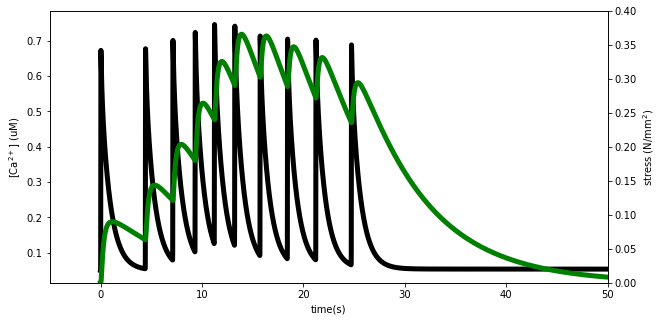

In [54]:
fig = plt.figure(figsize=(10,5))
time_axis = np.arange(0, 200, 0.0002)
ax = fig.add_subplot(1,1,1)
ax.plot(time_axis, ca, 'k', linewidth=5)
ax2 = ax.twinx()
ax2.plot(time_axis, force_ecto, 'g', linewidth=5)
ax.set_xlabel('time(s)')
ax.set_ylabel('[Ca$^{2+}$] (uM)')
ax2.set_ylabel('stress (N/mm$^2$)')
plt.xlim(-5, 50)
plt.ylim(0, 0.4)
plt.show()

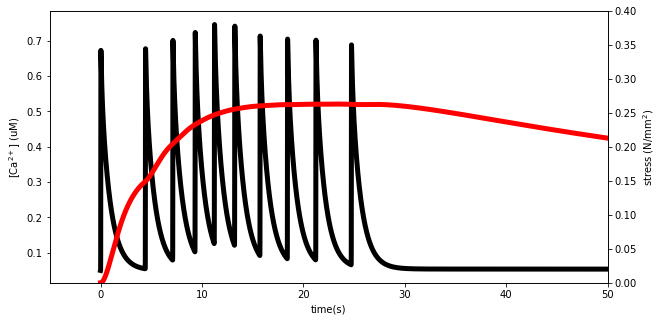

In [55]:
fig = plt.figure(figsize=(10,5))
time_axis = np.arange(0, 200, 0.0002)
ax = fig.add_subplot(1,1,1)
ax.plot(time_axis, ca, 'k', linewidth=5)
ax2 = ax.twinx()
ax2.plot(time_axis, force_endo, 'r', linewidth=5)
ax.set_xlabel('time(s)')
ax.set_ylabel('[Ca$^{2+}$] (uM)')
ax2.set_ylabel('stress (N/mm$^2$)')
plt.xlim(-5, 50)
plt.ylim(0, 0.4)
plt.show()